# Clustering from 14 cells of module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
folder = '../../../data/external/'
file = 'DT_CU1_parameters_1_exp_all_cells-OL.xlsx'

In [3]:
xls = pd.ExcelFile(folder + file)
dfs = {sheet_name: xls.parse(sheet_name, skiprows=1) for sheet_name in xls.sheet_names}

In [4]:
dfs['T = 10']['temperature'] = 10
dfs['T = 25']['temperature'] = 25
dfs['T = 40']['temperature'] = 40

In [5]:
df = pd.concat([df for df in dfs.values()], ignore_index=True, axis=0)

In [6]:
columns_to_drop = ['filename', 'data', 'start interval', 'end interval', 'skip', 'num value extrap', 'Rsqd', 'RMSE fitting', 'Cella']
df = df.drop(columns=columns_to_drop)

In [7]:
df['Soc'] /= 100

In [8]:
df = df.rename(columns={'Soc':'soc', 'R_0':'r0', 'R_1':'r1', 'C_1':'c1', 'OCV':'ocv'})

In [9]:
df

,soc,r0,r1,c1,ocv,temperature
0,1.0,0.002795,0.003027,29786.843907,4.062643,25
1,0.9,0.002781,0.002631,26793.109359,4.043000,25
2,0.8,0.002959,0.003692,26206.770038,3.946000,25
3,0.7,0.003096,0.004645,42346.288292,3.860000,25
4,0.6,0.003265,0.003055,35860.259968,3.761000,25
...,...,...,...,...,...,...
1381,0.4,0.002476,0.002951,39787.364708,3.670000,40
1382,0.3,0.002544,0.003094,51741.018882,3.636000,40
1383,0.2,0.002490,0.002714,43642.748498,3.586000,40
1384,0.1,0.002660,0.002539,44823.906695,3.527000,40


## DBSCAN

In [10]:
df_dbscan = None
df_dbscan = df.copy()

# Select features and normalize
features = df_dbscan[['r0', 'r1', 'c1']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # adjust eps and min_samples as needed
dbscan_predictions = dbscan.fit_predict(X_scaled)

# Add to dataframe
df_dbscan['dbscan_label'] = dbscan_predictions

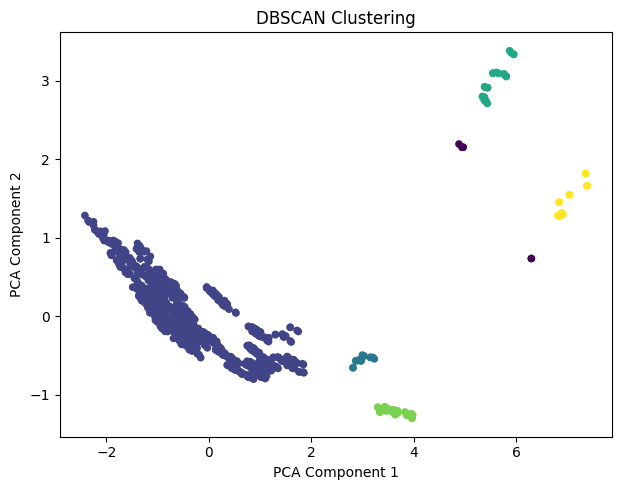

In [12]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

df_dbscan['x'] = X_2d[:, 0]
df_dbscan['y'] = X_2d[:, 1]

# Plot predicted clusters
plt.figure(figsize=(12, 5))

# Plot DBSCAN clustering result
plt.subplot(1, 2, 1)
plt.scatter(df_dbscan['x'], df_dbscan['y'], c=dbscan_predictions, cmap='viridis', s=20)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

In [13]:
set(df_dbscan['dbscan_label'])

{-1, 0, 1, 2, 3, 4}

## Shapiro-Wilk test

In [14]:
from scipy.stats import shapiro
from sklearn.decomposition import PCA

for label in df_dbscan['dbscan_label'].unique():
    subset = df_dbscan[df_dbscan['dbscan_label'] == label][['r0', 'r1', 'c1']]
    region = df_dbscan[df_dbscan['dbscan_label'] == label][['soc', 'temperature']]
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(subset)

    print(f"Cluster {label} ({len(subset)} points)")
    for i in range(2):
        stat, p = shapiro(reduced[:, i])
        print(f"  PC{i+1}: p-value={p}")
    print(f"Region: SoC [{region['soc'].min()}, {region['soc'].max()}] - Temperature [{region['temperature'].min()}, {region['temperature'].max()}]")

Cluster 0 (1302 points)
  PC1: p-value=2.5221354699276257e-08
  PC2: p-value=2.9088171240985114e-19
Region: SoC [0.0, 1.0] - Temperature [10, 40]
Cluster 1 (14 points)
  PC1: p-value=0.019518745436347244
  PC2: p-value=0.06837953044952985
Region: SoC [0.1, 0.1] - Temperature [10, 10]
Cluster 2 (24 points)
  PC1: p-value=0.10255147015368653
  PC2: p-value=0.034644491448451234
Region: SoC [0.0, 0.0] - Temperature [10, 10]
Cluster 3 (28 points)
  PC1: p-value=0.07117030078195458
  PC2: p-value=0.24682203409519446
Region: SoC [0.1, 0.1] - Temperature [10, 10]
Cluster 4 (12 points)
  PC1: p-value=0.05992485944564347
  PC2: p-value=0.12170771012390526
Region: SoC [0.0, 0.0] - Temperature [10, 10]
Cluster -1 (6 points)
  PC1: p-value=0.004399722611864732
  PC2: p-value=0.37952946049929914
Region: SoC [0.0, 0.0] - Temperature [10, 10]


# Clustering parameters of a single cell

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA

In [16]:
folder = '../../../data/external/'
file = 'DT_parameters_1RC_5T_single_cell_C15.xlsx'

In [17]:
xls = pd.ExcelFile(folder + file)
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

In [18]:
df = pd.concat([df for df in dfs.values()], ignore_index=True, axis=0)

In [19]:
columns_to_drop = ['filename', 'data', 'start interval', 'end interval', 'skip', 'num value extrap', 'Rsqd', 'RMSE fitting']
df = df.drop(columns=columns_to_drop)

In [20]:
df['Soc'] /= 100

In [21]:
df = df.rename(columns={'Soc':'soc', 'R_0':'r0', 'R_1':'r1', 'C_1':'c1', 'OCV':'ocv', 'Temp':'temp'})

In [22]:
df

,soc,r0,r1,c1,ocv,temp
0,1.0,0.005951,0.002942,10659.636448,4.040075,0
1,0.9,0.005921,0.007729,7198.722594,4.027800,0
2,0.8,0.005770,0.007483,8956.178017,3.929000,0
3,0.7,0.005826,0.007141,8409.383822,3.825700,0
4,0.6,0.005830,0.007193,7470.025430,3.744400,0
5,0.5,0.005917,0.007790,6617.542975,3.691400,0
6,0.4,0.005894,0.008995,5326.965646,3.655000,0
7,0.3,0.005820,0.011913,2796.826156,3.622300,0
8,0.2,0.005448,0.022881,310.895337,3.578900,0
9,0.1,0.006402,0.021622,187.006947,3.568800,0


## DBSCAN

In [38]:
df_dbscan = None
df_dbscan = df.copy()

# Select features and normalize
features = df_dbscan[['r0', 'r1', 'c1']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [44]:
dbscan = DBSCAN(eps=0.3, min_samples=5)  # adjust eps and min_samples as needed
dbscan_predictions = dbscan.fit_predict(X_scaled)

# Add to dataframe
df_dbscan['dbscan_label'] = dbscan_predictions

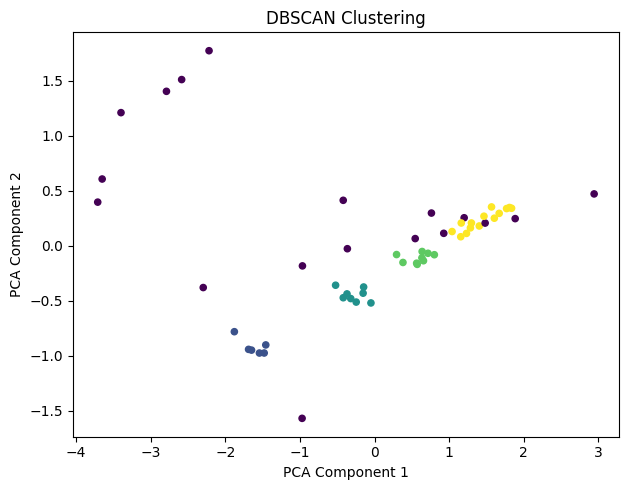

In [45]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

df_dbscan['x'] = X_2d[:, 0]
df_dbscan['y'] = X_2d[:, 1]

# Plot predicted clusters
plt.figure(figsize=(12, 5))

# Plot DBSCAN clustering result
plt.subplot(1, 2, 1)
plt.scatter(df_dbscan['x'], df_dbscan['y'], c=dbscan_predictions, cmap='viridis', s=20)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

In [46]:
set(df_dbscan['dbscan_label'])

{-1, 0, 1, 2, 3}

## Shapiro-Wilk test

In [28]:
from scipy.stats import shapiro
from sklearn.decomposition import PCA

for label in df_dbscan['dbscan_label'].unique():
    subset = df_dbscan[df_dbscan['dbscan_label'] == label][['r0', 'r1', 'c1']]
    region = df_dbscan[df_dbscan['dbscan_label'] == label][['soc', 'temp']]
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(subset)

    print(f"Cluster {label} ({len(subset)} points)")
    for i in range(2):
        stat, p = shapiro(reduced[:, i])
        print(f"  PC{i+1}: p-value={p}")
    print(f"Region: SoC [{region['soc'].min()}, {region['soc'].max()}] - Temperature [{region['temp'].min()}, {region['temp'].max()}]")

Cluster -1 (18 points)
  PC1: p-value=0.0030386599437348693
  PC2: p-value=0.012612802389152208
Region: SoC [0.0, 1.0] - Temperature [0, 40]
Cluster 0 (6 points)
  PC1: p-value=0.9411425001911722
  PC2: p-value=0.5671572730669534
Region: SoC [0.4, 0.9] - Temperature [0, 0]
Cluster 1 (8 points)
  PC1: p-value=0.26766660012872456
  PC2: p-value=0.30308065734674644
Region: SoC [0.3, 1.0] - Temperature [10, 10]
Cluster 2 (9 points)
  PC1: p-value=0.3157174428931625
  PC2: p-value=0.6423284679791151
Region: SoC [0.2, 1.0] - Temperature [20, 20]
Cluster 3 (14 points)
  PC1: p-value=0.9705543842827623
  PC2: p-value=0.5399163097703066
Region: SoC [0.1, 1.0] - Temperature [30, 40]


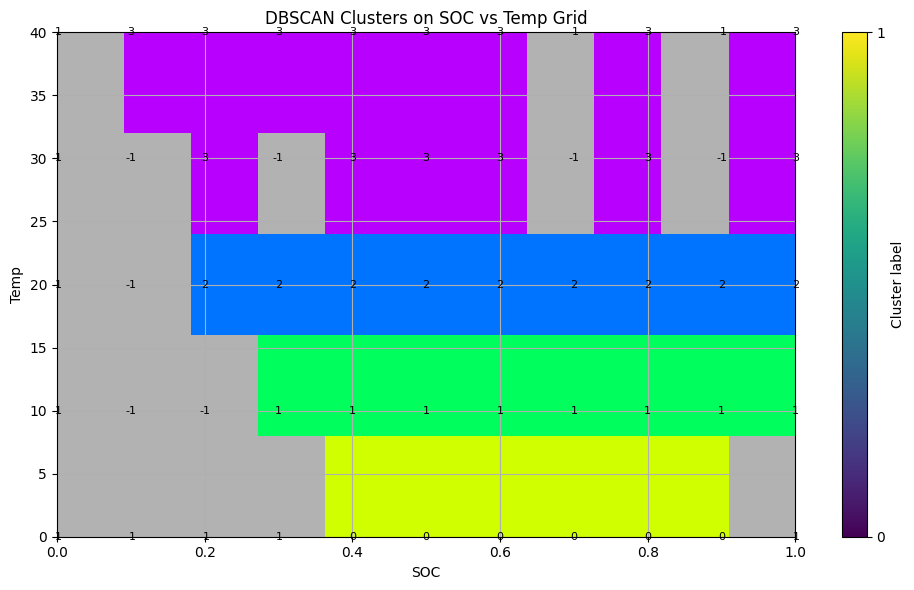

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_dbscan is your DataFrame
# If you're loading from a CSV or similar:
# df_dbscan = pd.read_csv("your_data.csv")

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a pivot table for the grid
# We'll pivot using 'temp' (y-axis) and 'soc' (x-axis)
# The values will be the cluster labels
pivot_table = df_dbscan.pivot(index='temp', columns='soc', values='dbscan_label')

# Define a colormap: use seaborn or matplotlib color palettes
unique_labels = sorted(df_dbscan['dbscan_label'].unique())
n_clusters = len([l for l in unique_labels if l != -1])
cmap = sns.color_palette("hsv", n_clusters)

# Add a color for noise (-1)
colors = {label: cmap[label] if label != -1 else (0.7, 0.7, 0.7)  # gray for noise
          for i, label in enumerate(unique_labels)}

# Apply the colors to the pivot table
colored_grid = pivot_table.copy()
colored_grid = colored_grid.map(lambda label: colors.get(label, (1, 1, 1)))  # white if label missing

# Convert color tuples to a format matplotlib can show
rgb_image = np.array([[colored_grid.loc[t, s] for s in colored_grid.columns]
                      for t in colored_grid.index])

# Plotting
plt.imshow(rgb_image, aspect='auto', origin='lower',
           extent=[colored_grid.columns.min(), colored_grid.columns.max(),
                   colored_grid.index.min(), colored_grid.index.max()])

plt.colorbar(label="Cluster label", ticks=unique_labels)
plt.xlabel("SOC")
plt.ylabel("Temp")
plt.title("DBSCAN Clusters on SOC vs Temp Grid")

# Optional: Annotate each cell with the cluster label
for i, temp in enumerate(colored_grid.index):
    for j, soc in enumerate(colored_grid.columns):
        label = pivot_table.loc[temp, soc]
        plt.text(soc, temp, str(label), ha='center', va='center', fontsize=8, color='black')

plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
for label in set(df_dbscan['dbscan_label']):
    df_cluster = df_dbscan[df_dbscan['dbscan_label'] == label]
    df_cluster = df_cluster[['soc', 'r0', 'r1', 'c1', 'temp']]
#    df_cluster.to_csv(f"cluster{label}.csv")